## Calculating Boolean statistics

In [1]:
import pandas as pd
import numpy as np
pd.set_option("max_columns", 4, "max_rows", 10)
movie = pd.read_csv("C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/movie.csv", index_col='movie_title')

In [2]:
movie[['duration']].head()

,duration
movie_title,
Avatar,178.0
Pirates of the Caribbean: At World's End,169.0
Spectre,148.0
The Dark Knight Rises,164.0
Star Wars: Episode VII - The Force Awakens,NaN


In [3]:
# Determine whether the duration of each movie is 
# longer than two hours by using the greater than 
# comparison operator with the duration column:
movie_2_hours = movie["duration"] > 120

In [4]:
movie_2_hours.head(10)

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
John Carter                                    True
Spider-Man 3                                   True
Tangled                                       False
Avengers: Age of Ultron                        True
Harry Potter and the Half-Blood Prince         True
Name: duration, dtype: bool

In [5]:
# We can now use this Series to determine the number 
# of movies that are longer than two hours:

movie_2_hours.sum()

1039

In [6]:
# To find the percentage of movies in the dataset 
# longer than two hours, use the .mean method:

movie_2_hours.mean() * 100

21.13506916192026

In [7]:
movie["duration"].dropna().gt(120).mean() * 100

21.199755152009793

In [8]:
# Use the .describe method to output summary statistics
# on the Boolean array:
movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

In [9]:
movie_2_hours.value_counts(normalize=True)

False    0.788649
True     0.211351
Name: duration, dtype: float64

In [10]:
# shows that pandas applies the .describe method to
# Boolean arrays the same way it applies it to a 
# column of objects or strings, 
# by displaying frequency information
movie_2_hours.astype(int).describe()

count    4916.000000
mean        0.211351
std         0.408308
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: duration, dtype: float64

In [11]:
actors = movie[
    ["actor_1_facebook_likes", "actor_2_facebook_likes"]
].dropna()

(
    actors["actor_1_facebook_likes"] > actors["actor_2_facebook_likes"]
).mean()

0.9777687130328371

### Constructing multiple Boolean conditions

In [12]:
# Load in the movie dataset and set the title 
# as the index:
# create a variable to hold each filter as a Boolean array:
criteria1 = movie.imdb_score > 8



In [13]:
criteria2 = movie.content_rating ==  'pg-13'

In [14]:
criteria3 = (movie.title_year < 2000) | (movie.title_year > 2009)

In [15]:
criteria3

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                        True
The Following                                 False
A Plague So Pleasant                           True
Shanghai Calling                               True
My Date with Drew                             False
Name: title_year, Length: 4916, dtype: bool

In [16]:
# combine all the filters into a single Boolean array:
criteria_final = criteria1 & criteria2 & criteria3

In [17]:
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                         False
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [18]:
5 < 10 and 3 > 4

False

In [19]:
5 < 10 and 3 > 4

False

In [20]:
True and 3 > 4


False

In [21]:
True and False

False

In [22]:
False

False

In [23]:
movie.title_year < 2000 | movie.title_year > 2009

TypeError: Cannot perform 'ror_' with a dtyped [float64] array and scalar of type [bool]

In [24]:
(movie.title_year < 2000) | (movie.title_year > 2009)

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                        True
The Following                                 False
A Plague So Pleasant                           True
Shanghai Calling                               True
My Date with Drew                             False
Name: title_year, Length: 4916, dtype: bool

## Filtering with Boolean arrays

In [47]:
crit_a1= movie.imdb_score > 8

In [57]:
crit_a1= movie.imdb_score > 8
crit_a2 = movie.content_rating == "PG-13"
crit_a3 = (movie.title_year < 2000) | (movie.title_year > 2009)

In [58]:
final_crit_a = crit_a1 & crit_a2 & crit_a3

In [59]:
movie[final_crit_a].head()

,color,director_name,...,aspect_ratio,movie_facebook_likes
movie_title,,,,,
The Dark Knight Rises,Color,Christopher Nolan,...,2.35,164000
The Avengers,Color,Joss Whedon,...,1.85,123000
Captain America: Civil War,Color,Anthony Russo,...,2.35,72000
Guardians of the Galaxy,Color,James Gunn,...,2.35,96000
Interstellar,Color,Christopher Nolan,...,2.35,349000


In [30]:
# Create criteria for the second set of movies:

crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == "R"
crit_b3 = (movie.title_year >= 2000) & (movie.title_year <= 2010)

In [31]:
final_crit_b = crit_b1 + crit_b2 + crit_b3

In [32]:
# Combine the two sets of criteria using the pandas or 
# operator. This yields a Boolean array of all movies
# that are members of either set:

final_crit_all = final_crit_a | final_crit_b

In [33]:
final_crit_all.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [34]:
# Once you have your Boolean array, you pass it to the
# index operator to filter the data:
movie[final_crit_all].head()

,color,director_name,...,aspect_ratio,movie_facebook_likes
movie_title,,,,,
Avatar,Color,James Cameron,...,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,...,2.35,0
The Dark Knight Rises,Color,Christopher Nolan,...,2.35,164000
Spider-Man 3,Color,Sam Raimi,...,2.35,0
Tangled,Color,Nathan Greno,...,1.85,29000


In [35]:
# we can also filter off of the .loc attribute:
movie.loc[final_crit_all].head()

,color,director_name,...,aspect_ratio,movie_facebook_likes
movie_title,,,,,
Avatar,Color,James Cameron,...,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,...,2.35,0
The Dark Knight Rises,Color,Christopher Nolan,...,2.35,164000
Spider-Man 3,Color,Sam Raimi,...,2.35,0
Tangled,Color,Nathan Greno,...,1.85,29000


In [39]:
# In addition, we can specify columns to select with
# the .loc attribute:
cols = ["imdb_score", "content_rating", "title_year"]
movie_filtered = movie.loc[final_crit_all, cols]

In [37]:
movie_filtered

,imdb_score,content_rating,title_year
movie_title,,,
Avatar,7.9,PG-13,2009.0
Pirates of the Caribbean: At World's End,7.1,PG-13,2007.0
The Dark Knight Rises,8.5,PG-13,2012.0
Spider-Man 3,6.2,PG-13,2007.0
Tangled,7.8,PG,2010.0
...,...,...,...
Primer,7.0,PG-13,2004.0
Cavite,6.3,Not Rated,2005.0
El Mariachi,6.9,R,1992.0


In [40]:
# The .iloc attribute does not support Boolean arrays! 
# If you pass in a Boolean Series to it, an exception
# will get raised. However, it does work with NumPy
# arrays, so if you call the .to_numpy() method,
# you can filter with it:
movie.iloc[final_crit_all]

ValueError: iLocation based boolean indexing cannot use an indexable as a mask

In [42]:
movie.iloc[final_crit_all.to_numpy()]

,color,director_name,...,aspect_ratio,movie_facebook_likes
movie_title,,,,,
Avatar,Color,James Cameron,...,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,...,2.35,0
The Dark Knight Rises,Color,Christopher Nolan,...,2.35,164000
Spider-Man 3,Color,Sam Raimi,...,2.35,0
Tangled,Color,Nathan Greno,...,1.85,29000
...,...,...,...,...,...
Primer,Color,Shane Carruth,...,1.85,19000
Cavite,Color,Neill Dela Llana,...,NaN,74
El Mariachi,Color,Robert Rodriguez,...,1.37,0


In [74]:
# To replicate the final_crit_a variable from step 1
# with one long line of code, we can do the following:
final_crit_a2 = (
    (movie.imdb_score > 8)
    & (movie.content_rating == "PG-13")
    & (
        (movie.title_year < 2000) 
        | (movie.title_year > 2009)
    )
)

In [75]:
final_crit_a2.equals(final_crit_a)

True

In [61]:
movie.loc[final_crit_a2].head()

,color,director_name,...,aspect_ratio,movie_facebook_likes
movie_title,,,,,
The Dark Knight Rises,Color,Christopher Nolan,...,2.35,164000
The Avengers,Color,Joss Whedon,...,1.85,123000
Captain America: Civil War,Color,Anthony Russo,...,2.35,72000
The Dark Knight,Color,Christopher Nolan,...,2.35,37000
Guardians of the Galaxy,Color,James Gunn,...,2.35,96000


###  Comparing row filtering and index filtering 

In [77]:
# Read in the college dataset and use Boolean 
# indexing to select all institutions from 
# the state of Texas (TX):

college = pd.read_csv("C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/college.csv")

In [95]:
college["STABBR"] == "TX"

0       False
1       False
2       False
3       False
4       False
        ...  
7530    False
7531    False
7532    False
7533    False
7534     True
Name: STABBR, Length: 7535, dtype: bool

In [82]:

college[college["STABBR"] == "TX"].head()

,INSTNM,CITY,...,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,...,40200,25985
3611,Alvin Community College,Alvin,...,34500,6750
3612,Amarillo College,Amarillo,...,31700,10950
3613,Angelina College,Lufkin,...,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,...,37700,21319.5


In [90]:
# To repeat this using index selection, move the
# STABBR column into the index. We can then use
# label-based selection with the .loc indexer:
college2 = college.set_index("STABBR")

In [91]:
college2.loc["TX"].head()

,INSTNM,CITY,...,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,
TX,Abilene Christian University,Abilene,...,40200,25985
TX,Alvin Community College,Alvin,...,34500,6750
TX,Amarillo College,Amarillo,...,31700,10950
TX,Angelina College,Lufkin,...,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,...,37700,21319.5


In [88]:
# Let compare the speed of both methods 
%timeit college[college["STABBR"] == 'TX']

1.05 ms ± 74.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [89]:
%timeit college2 .loc['TX']

627 µs ± 151 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [97]:
# Boolean indexing takes two times as long as index 
# selection. As setting the index does not come for
# free, let's time that operation as well:

%timeit college2 = college.set_index("STABBR")

4.17 ms ± 496 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [100]:
states = ["TX", "CA", "NY"]
college[college["STABBR"].isin(states)]

,INSTNM,CITY,...,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
192,Academy of Art University,San Francisco,...,36000,35093
193,ITT Technical Institute-Rancho Cordova,Rancho Cordova,...,38800,25827.5
194,Academy of Chinese Culture and Health Sciences,Oakland,...,NaN,PrivacySuppressed
195,The Academy of Radio and TV Broadcasting,Huntington Beach,...,28400,9500
196,Avalon School of Cosmetology-Alameda,Alameda,...,21600,9860


In [101]:
college2.loc[states]

,INSTNM,CITY,...,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,
TX,Abilene Christian University,Abilene,...,40200,25985
TX,Alvin Community College,Alvin,...,34500,6750
TX,Amarillo College,Amarillo,...,31700,10950
TX,Angelina College,Lufkin,...,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,...,37700,21319.5
...,...,...,...,...,...
NY,Briarcliffe College–Patchogue,Patchogue,...,38200,28720.5
NY,Jamestown Business College -,Salamanca,...,NaN,12050
NY,Pratt Manhattan-A Division of Pratt Institute,New York,...,40900,26691


### Selecting with unique amd sorted indexes

In [102]:
# Read in the college dataset, create a separate
# DataFrame with STABBR as the index,
# and check whether the index is sorted

college2 = college.set_index("STABBR")

In [103]:
college2.index.is_monotonic

False

In [105]:
# Sort the index from college2 and store it as
# another object:
college3 = college2.sort_index()

In [107]:
college3.index.is_monotonic

True

In [108]:
# Time the selection of the state of Texas (TX)
# from all three DataFrames
%timeit college[college["STABBR"] == "TX"]

1.03 ms ± 41 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [109]:
%timeit college2.loc["TX"]

453 µs ± 20.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [110]:
%timeit college3.loc["TX"]

54.6 µs ± 5.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [116]:
# The sorted index performs nearly an order of 
# magnitude faster than Boolean selection. Let's now
# turn toward unique indexes. For this, we use the
# institution name as the index:
college_unique = college.set_index("INSTNM")
college_unique.index.is_unique


True

In [120]:
# Let's select Stanford University with Boolean
# indexing. Note that this returns a DataFrame:
college[college["INSTNM"] == "Stanford University"]

,INSTNM,CITY,...,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,...,86000,12782


In [123]:
# Let's select Stanford University with index 
# selection. Note that this returns a Series:
college_unique.loc['Stanford University']

CITY                  Stanford
STABBR                      CA
HBCU                       0.0
MENONLY                    0.0
WOMENONLY                  0.0
                        ...   
PCTPELL                 0.1556
PCTFLOAN                0.1256
UG25ABV                 0.0401
MD_EARN_WNE_P10          86000
GRAD_DEBT_MDN_SUPP       12782
Name: Stanford University, Length: 26, dtype: object

In [124]:
# If we want a DataFrame rather than a Series,we need
# to pass in a list of index values into .loc:
college_unique.loc[["Stanford University"]]

,CITY,STABBR,...,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,
Stanford University,Stanford,CA,...,86000,12782


In [126]:
# They both produce the same data, just with 
# different objects. Let's time each approach:
%timeit college[college['INSTNM'] == "Stanford University"]

936 µs ± 78 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [127]:
%timeit college_unique.loc[['Stanford University']]

412 µs ± 34.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [128]:
college.index = (
    college["CITY"] + ", " + college["STABBR"]
)

In [129]:
college = college.sort_index()

In [130]:
college.head()

,INSTNM,CITY,...,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"ARTESIA, CA",Angeles Institute,ARTESIA,...,NaN,16850
"Aberdeen, SD",Presentation College,Aberdeen,...,35900,25000
"Aberdeen, SD",Northern State University,Aberdeen,...,33600,24847
"Aberdeen, WA",Grays Harbor College,Aberdeen,...,27000,11490
"Abilene, TX",Hardin-Simmons University,Abilene,...,38700,25864


In [132]:
# From here, we can select all colleges from a
# particular city and state combination without
# Boolean indexing. Let's select all
# colleges from Miami, FL:

college.loc["Miami, FL"].head()

,INSTNM,CITY,...,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami, FL",New Professions Technical Institute,Miami,...,18700,8682
"Miami, FL",Management Resources College,Miami,...,PrivacySuppressed,12182
"Miami, FL",Strayer University-Doral,Miami,...,49200,36173.5
"Miami, FL",Keiser University- Miami,Miami,...,29700,26063
"Miami, FL",George T Baker Aviation Technical College,Miami,...,38600,PrivacySuppressed


In [140]:
# We can compare the speed of this compound index 
# selection with Boolean indexing. There is almost 
# an order of magnitude difference:

%%timeit
crit1 = college["CITY"] == "Miami"
crit2 = college["STABBR"] == 'FL'
college[crit1 & crit2]

UsageError: Line magic function `%%timeit` not found.


In [137]:
%timeit college.loc["Miami, FL"]

55.5 µs ± 2.78 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Translating SQL WHERE clauses

In [142]:
# Read in the employee dataset as a DataFrame:
employee = pd.read_csv("C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/employee.csv")

In [143]:
# Before filtering out the data, it is helpful to do
# some manual inspection of each of the filtered 
# columns to know the exact values that will be
# used in the filter:

employee.dtypes

UNIQUE_ID              int64
POSITION_TITLE        object
DEPARTMENT            object
BASE_SALARY          float64
RACE                  object
EMPLOYMENT_TYPE       object
GENDER                object
EMPLOYMENT_STATUS     object
HIRE_DATE             object
JOB_DATE              object
dtype: object

In [149]:
employee.DEPARTMENT.value_counts().head()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [148]:
employee.GENDER.value_counts()

Male      1397
Female     603
Name: GENDER, dtype: int64

In [150]:
employee.BASE_SALARY.describe()

count      1886.000000
mean      55767.931601
std       21693.706679
min       24960.000000
25%       40170.000000
50%       54461.000000
75%       66614.000000
max      275000.000000
Name: BASE_SALARY, dtype: float64

In [157]:
# Write a single statement for each of the criteria.
# Use the isin method to test equality
# to one of many values:
depts = [ 
    "Houston Police Department-HPD",
    "Houston Fire Department (HFD)",
]

In [158]:
criteria_dept = employee.DEPARTMENT.isin(depts)
criteria_gender = employee.GENDER == "Female"
criteria_sal = (employee.BASE_SALARY >= 80000) & (employee.BASE_SALARY <= 120000)

In [159]:
# Combine all the Boolean arrays:

criteria_final = (
    criteria_dept & criteria_gender & criteria_sal
)

In [161]:
# Use Boolean indexing to select only the rows that 
# meet the final criteria:
select_columns = [
    "UNIQUE_ID",
    'DEPARTMENT',
    'GENDER',
    'BASE_SALARY'
]

employee.loc[criteria_final, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


In [163]:
''' {.sourceCode .pycon}
criteria_sal = employee.BASE_SALARY.between(80_000, 120_000)
'''

' {.sourceCode .pycon}\ncriteria_sal = employee.BASE_SALARY.between(80_000, 120_000)\n'

In [165]:
top_5_depts = employee.DEPARTMENT.value_counts().index[:5]

In [166]:
criteria = ~employee.DEPARTMENT.isin(top_5_depts)

In [167]:
employee[criteria]

,UNIQUE_ID,POSITION_TITLE,...,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),...,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,...,2000-07-19,2010-09-18
4,4,ELECTRICIAN,...,1989-06-19,1994-10-22
18,18,MAINTENANCE MECHANIC III,...,2008-12-29,2008-12-29
32,32,SENIOR ACCOUNTANT,...,1991-02-11,2016-02-13
...,...,...,...,...,...
1976,1976,SENIOR SIDELOADER OPERATOR,...,2015-07-20,2016-01-30
1983,1983,ADMINISTRATIVE SPECIALIST,...,2006-10-16,2006-10-16
1985,1985,TRUCK DRIVER,...,2013-06-10,2015-08-01
1988,1988,SENIOR ASSISTANT CITY ATTORNEY II,...,2013-01-23,2013-03-02


### Improving the readability of Boolean indexing with the query method

In [168]:
employee

,UNIQUE_ID,POSITION_TITLE,...,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),...,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,...,2000-07-19,2010-09-18
2,2,POLICE OFFICER,...,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,...,1982-02-08,1991-05-25
4,4,ELECTRICIAN,...,1989-06-19,1994-10-22
...,...,...,...,...,...
1995,1995,POLICE OFFICER,...,2014-06-09,2015-06-09
1996,1996,COMMUNICATIONS CAPTAIN,...,2003-09-02,2013-10-06
1997,1997,POLICE OFFICER,...,2014-10-13,2015-10-13
1998,1998,POLICE OFFICER,...,2009-01-20,2011-07-02


In [169]:
# Read in the employee data, assign the chosen
# departments, and import columns to variables
employee = pd.read_csv("C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/employee.csv")

In [170]:
depts = [
    "Houston Police Department-HPD",
    "Houston Fire Department (HFD)",
    
]

In [171]:
select_columns = [
    "UNIQUE_ID",
    'DEPARTMENT',
    'GENDER',
    'BASE_SALARY'
]


In [172]:
# Build the query string and execute the method. Note 
# that the .query method does not like triple quoted
# strings spanning multiple lines, hence the ugly
# concatenation

qs = (
      "DEPARTMENT in @depts "
    " and GENDER == 'Female' "
    " and 80000 <= BASE_SALARY <= 120000"
)

In [173]:
emp_filtered = employee.query(qs)

In [175]:
emp_filtered[select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


In [182]:
top10_debts = (
    employee.DEPARTMENT.value_counts()
    .index[:10]
    .tolist()
)

In [183]:
qs = "DEPARTMENT not in @top10_debts and GENDER == 'Female'"

In [184]:
employee_filtered2 = employee.query(qs)

In [185]:
employee_filtered2.head()

,UNIQUE_ID,POSITION_TITLE,...,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),...,2006-06-12,2012-10-13
73,73,ADMINISTRATIVE SPECIALIST,...,2011-12-19,2013-11-23
96,96,ASSISTANT CITY CONTROLLER III,...,2013-06-10,2013-06-10
117,117,SENIOR ASSISTANT CITY ATTORNEY I,...,1998-03-20,2012-07-21
146,146,SENIOR STAFF ANALYST,...,2014-03-17,2014-03-17


### Preserving Series Size with the .Where method

In [186]:
# Read the movie dataset, set the movie title as the 
# index, and select all the values in the
# actor_1_facebook_likes column that are not missing:
movie = pd.read_csv("C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/movie.csv", index_col="movie_title")

In [187]:
fb_likes = movie["actor_1_facebook_likes"].dropna()

In [188]:
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [189]:
# Let's use the describe method to get a sense of the
# distribution
fb_likes.describe()

count      4909.000000
mean       6494.488491
std       15106.986884
min           0.000000
25%         607.000000
50%         982.000000
75%       11000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

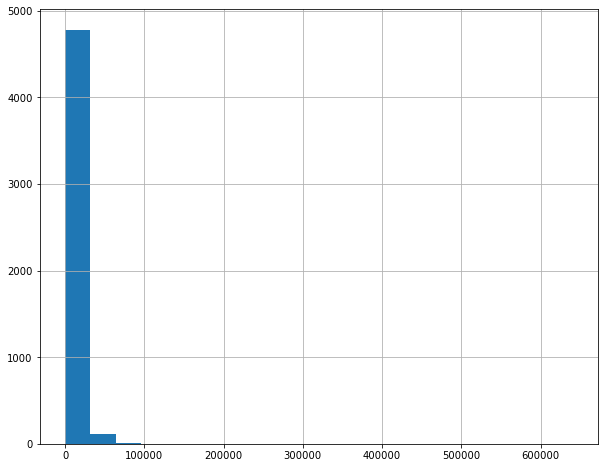

In [192]:
# Additionally, we may plot a histogram of this Series
# to visually inspect the distribution. The code below
# calls plt.subplots to specify the figure size,
# but is not needed in general:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
fb_likes.hist(ax=ax, bins=20)

fig.savefig('c7-hist.png', dpi=300)

### This visualization
makes it difficult to get a sense of the distribution. On the other
hand, the summary statistics from step 2 appear to be telling us that the data is
highly skewed to the right with a few very large observations (more than an order of
magnitude greater than the median). Let's create criteria to test whether the number
of likes is fewer than 20,000:

In [194]:
criteria_high = fb_likes < 20_000

In [195]:
criteria_high.mean().round(2)

0.91

About 91% of the movies have an actor 1 with fewer than 20,000 likes. We will now
use the .where method, which accepts a Boolean array. The default behavior is to
return a Series the same size as the original, but which has all the False locations
replaced with a missing value:

In [196]:
fb_likes.where(criteria_high).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [198]:
# The second parameter to the .where method, other, 
# allows you to control the replacement value. Let's 
# change all the missing values to 20,000:
fb_likes.where(criteria_high, other=20000).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

Similarly, we can create criteria to put a floor on the minimum number of likes.
Here, we chain another .where method and replace the values not satisfying
the condition to 300:

In [200]:
criteria_low = fb_likes > 300
fb_likes_cap = fb_likes.where(
    criteria_high, other=20_000
).where(criteria_low, 300)

In [201]:
fb_likes_cap.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

In [204]:
# The lengths of the original Series and the modified
# Series are the same
len(fb_likes), len(fb_likes_cap)

(4909, 4909)

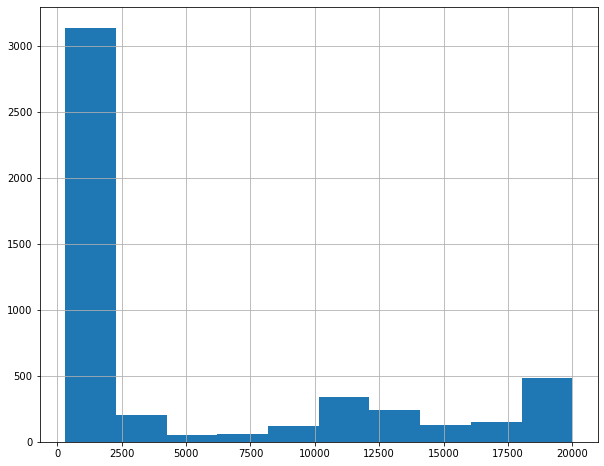

In [206]:
# Let's make a histogram with the modified Series.
# With the data in a much tighter range, 
# it should produce a better plot:
fig, ax = plt.subplots(figsize=(10, 8))
fb_likes_cap.hist(ax=ax)

fig.savefig("c7-hist2.png", dpi=300)

pandas actually has built-in methods, .clip, .clip_lower, and .clip_upper, that
replicate this operation. The .clip method can set a floor and ceiling at the same time

In [207]:
fb_likes_cap2 = fb_likes.clip(lower=300, upper=20000)
fb_likes_cap.equals(fb_likes_cap2)

True

## Mask DataFrame rows

The .mask method performs the complement of the .where method. By default, it creates
missing values wherever the Boolean condition is True. In essence, it is literally masking, or
covering up, values in your dataset.
In this recipe, we will mask all rows of the movie dataset that were made after 2010 and then
filter all the rows with missing values.

In [208]:
# Read the movie dataset, set the movie title as the
# index, and create the criteria:
movie = pd.read_csv("C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/movie.csv", index_col="movie_title")

In [209]:
c1 = movie["title_year"] >= 2010
c2 = movie["title_year"].isna()
criteria = c1 | c2

Use the .mask method on a DataFrame to remove the values for all the values
in rows with movies that were made from 2010. Any movie that originally had
a missing value for title_year is also masked:

In [211]:
movie.mask(criteria).head()


,color,director_name,...,aspect_ratio,movie_facebook_likes
movie_title,,,,,
Avatar,Color,James Cameron,...,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,...,2.35,0.0
Spectre,NaN,NaN,...,NaN,NaN
The Dark Knight Rises,NaN,NaN,...,NaN,NaN
Star Wars: Episode VII - The Force Awakens,NaN,NaN,...,NaN,NaN


Notice how all the values in the third, fourth, and fifth rows from the preceding
DataFrame are missing. Chain the .dropna method to remove rows that have
all values missing:

In [214]:
movie_mask = movie.mask(criteria).dropna(how='all')

In [215]:
movie_mask.head()

,color,director_name,...,aspect_ratio,movie_facebook_likes
movie_title,,,,,
Avatar,Color,James Cameron,...,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,...,2.35,0.0
Spider-Man 3,Color,Sam Raimi,...,2.35,0.0
Harry Potter and the Half-Blood Prince,Color,David Yates,...,2.35,10000.0
Superman Returns,Color,Bryan Singer,...,2.35,0.0


The operation in step 3 is just a complex way of doing basic Boolean indexing. We can
check whether the two methods produce the same DataFrame:

In [216]:
movie_boolean = movie[movie['title_year'] < 2010]
movie_mask.equals(movie_boolean)

False

In [217]:
# The .equals method informs us that they are not equal. 
# Something is wrong. Let's do some sanity checking
# and see whether they are the same shape
movie_mask.shape == movie_boolean.shape

True

When we used the preceding .mask method, it created many missing values. Missing values are float data types, so any column that was an integer type that got missing values was converted to a float type. The .equals method returns False if the data types of the columns are different, even if the values are the same. Let's
check the equality of the data types to see whether this scenario happened:

In [218]:
movie_mask.dtypes == movie_boolean.dtypes

color                       True
director_name               True
num_critic_for_reviews      True
duration                    True
director_facebook_likes     True
                           ...  
title_year                  True
actor_2_facebook_likes      True
imdb_score                  True
aspect_ratio                True
movie_facebook_likes       False
Length: 27, dtype: bool

It turns out that a couple of columns don't have the same data type. pandas has an
alternative for these situations. In its testing module, which is primarily used by
developers, there is a function, assert_frame_equal, that allows you to check
the equality of Series and DataFrames without also checking the equality of the data
types:

In [219]:
from pandas.testing import assert_frame_equal
assert_frame_equal(
    movie_boolean, movie_mask, check_dtype=False
)

In [221]:
%timeit movie.mask(criteria).dropna(how="all")

16.2 ms ± 4.05 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [222]:
%timeit movie[movie["title_year"] < 2010]

1.67 ms ± 141 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Selecting with Booleans, integer location, and labels

Previously, we covered a wide range of recipes on selecting different subsets of data through
the .iloc and .loc attributes. Both of these select rows and columns simultaneously by either integer location or  label. In this recipe, we will filter both rows and columns with the .iloc and .loc attributes

In [223]:
# Read in the movie dataset, set the index as the title,
# and then create a Boolean array matching all movies 
# with a content rating of G and an IMDB score less
# than 4:
movie = pd.read_csv("C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/movie.csv", index_col="movie_title")
c1 = movie["content_rating"] == 'g'
c2 = movie["imdb_score"] < 4
criteria = c1 | c2

In [224]:
# let first pass these criteria to .loc to filter 
# the rows
movie_loc = movie.loc[criteria]
movie_loc.head()

,color,director_name,...,aspect_ratio,movie_facebook_likes
movie_title,,,,,
Batman & Robin,Color,Joel Schumacher,...,1.85,0
Speed 2: Cruise Control,Color,Jan de Bont,...,2.35,894
The Cat in the Hat,Color,Bo Welch,...,1.85,946
Catwoman,Color,Pitof,...,2.35,0
Son of the Mask,Color,Lawrence Guterman,...,1.85,881


In [227]:
# Let's check whether this DataFrame is exactly equal
# to the one generated directly
# from the indexing operator:

movie_loc.equals(movie[criteria])

True

In [229]:
# Now, let's attempt the same Boolean
# indexing with the .iloc indexer:
movie_iloc = movie.iloc[criteria]

ValueError: iLocation based boolean indexing cannot use an indexable as a mask

It turns out that we cannot directly use a Series of Booleans because of the index.
We can, however, use an ndarray of Booleans. To get the array, use the .to_
numpy() method:

In [231]:
movie_iloc = movie.iloc[criteria.to_numpy()]
movie_iloc.equals(movie_loc)

True

In [232]:
movie_iloc.head()

,color,director_name,...,aspect_ratio,movie_facebook_likes
movie_title,,,,,
Batman & Robin,Color,Joel Schumacher,...,1.85,0
Speed 2: Cruise Control,Color,Jan de Bont,...,2.35,894
The Cat in the Hat,Color,Bo Welch,...,1.85,946
Catwoman,Color,Pitof,...,2.35,0
Son of the Mask,Color,Lawrence Guterman,...,1.85,881


In [233]:
# Although not very common, it is possible to do 
# Boolean indexing to select particular columns.
# Here, we select all the columns that have a data
# type of 64-bit integers:
criteria_col = movie.dtypes == np.int64

In [234]:
criteria_col.head()

color                      False
director_name              False
num_critic_for_reviews     False
duration                   False
director_facebook_likes    False
dtype: bool

In [237]:
movie.loc[:, criteria_col].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


As criteria_col is a Series, which always has an index, you must use the
underlying ndarray to make it work with .iloc. The following produces the same
result as step 6:

In [238]:
movie.iloc[:, criteria_col.to_numpy()].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


When using .loc, you can use a Boolean array to select rows, and specify
the columns you want with a list of labels. Remember, you need to put a comma
between the row and column selections. Let's keep the same row criteria and select
the content_rating, imdb_score, title_year, and gross columns:

In [239]:
cols = [
    "content_rating",
    "imdb_score",
    "title_year",
    "gross",
]

In [242]:
movie.loc[criteria, cols].sort_values('imdb_score' )

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Foodfight!,PG,1.7,2012.0,NaN
The Helix... Loaded,R,1.9,2005.0,NaN
Superbabies: Baby Geniuses 2,PG,1.9,2004.0,9109322.0
Disaster Movie,PG-13,1.9,2008.0,14174654.0
...,...,...,...,...
I Got the Hook Up,R,3.9,1998.0,10305534.0
AWOL-72,R,3.9,2015.0,NaN
Go for It!,PG-13,3.9,2011.0,178739.0


In [244]:
# You can create this same operation with .iloc, 
# but you need to specify the position of the columns:
col_index = [ movie.columns.get_loc(col) for col in cols]

In [245]:
col_index

[20, 24, 22, 8]

In [248]:
movie.iloc[criteria.to_numpy(), col_index].sort_values("imdb_score").head()

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Foodfight!,PG,1.7,2012.0,NaN
The Helix... Loaded,R,1.9,2005.0,NaN
Superbabies: Baby Geniuses 2,PG,1.9,2004.0,9109322.0
Disaster Movie,PG-13,1.9,2008.0,14174654.0


In [249]:
a = criteria.to_numpy()

In [250]:
a[:5]

array([False, False, False, False, False])

In [251]:
len(a), len(criteria)

(4916, 4916)

In [252]:
movie.select_dtypes(int)

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0
...,...,...,...
Signed Sealed Delivered,629,2283,84
The Following,73839,1753,32000
A Plague So Pleasant,38,0,16
